In [6]:
#filtering funtion
import numpy as np 
import cv2
import matplotlib.pyplot as plt

def matrix_sum(mat_1,mat_2):
    sum = 0
    for i in range(mat_1.shape[0]):
        for j in range(mat_1.shape[1]):
            sum = sum + mat_1[i][j] * mat_2[i][j]
    return sum
def filter_operation(image,kernel):
    #must use a odd size of filter
    kernel_center = (kernel.shape[0]-1)//2
    kernel_dimension = kernel.shape[0]
    image_height = image.shape[0]
    image_width = image.shape[1]
    out_image_height = int(image_height-2*kernel_center)
    out_image_width = int(image_width-2*kernel_center)
    out_image = np.zeros((out_image_height,out_image_width))
    #print(image.shape)
    #print(out_image.shape)
    
    for row in range(out_image_height):
        for column in range(out_image_width):
            mat = image[row:row+kernel_dimension,column:column+kernel_dimension]
            #print(mat)
            out_image[row,column] = matrix_sum(mat,kernel)/kernel_dimension/kernel_dimension
            
    #print("out image")
    #print(out_image)
    return out_image

In [7]:
def padd_image(img2,n):
    left = np.zeros((img2.shape[0],n))
    left = left + 255
    img2 = np.concatenate((img2, left), axis=1)
    img2 = np.concatenate((left, img2), axis=1)
    
    up = np.zeros((n,img2.shape[1]))
    up = up + 255
    img2 = np.concatenate((img2, up), axis=0)
    img2 = np.concatenate((up, img2), axis=0)
    return img2

In [8]:
#blur kernel
blur_kernel = np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]
])/16

edge_detection_kernel = np.array([
    [0,-1,0],
    [-1,4,-1],
    [0,-1,0]
])
edge_detection_kernel_2 = np.array([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
])

In [9]:
image = cv2.imread('image.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


In [10]:
#filtering loop
#blurring gives much better result for edge detection
filtered_image1 = filter_operation(padd_image(image,1),blur_kernel)
filter_image = filter_operation(image, edge_detection_kernel_2)
for i in range(1):
    filtered_image1 = filter_operation(filtered_image1, edge_detection_kernel_2)
filter_image2 = filtered_image1 - filter_image
filter_image3 = filter_image-filtered_image1

In [11]:
# filtered_image2 = padd_image(filtered_image1,1)
# filtered_image2 = image+filtered_image2

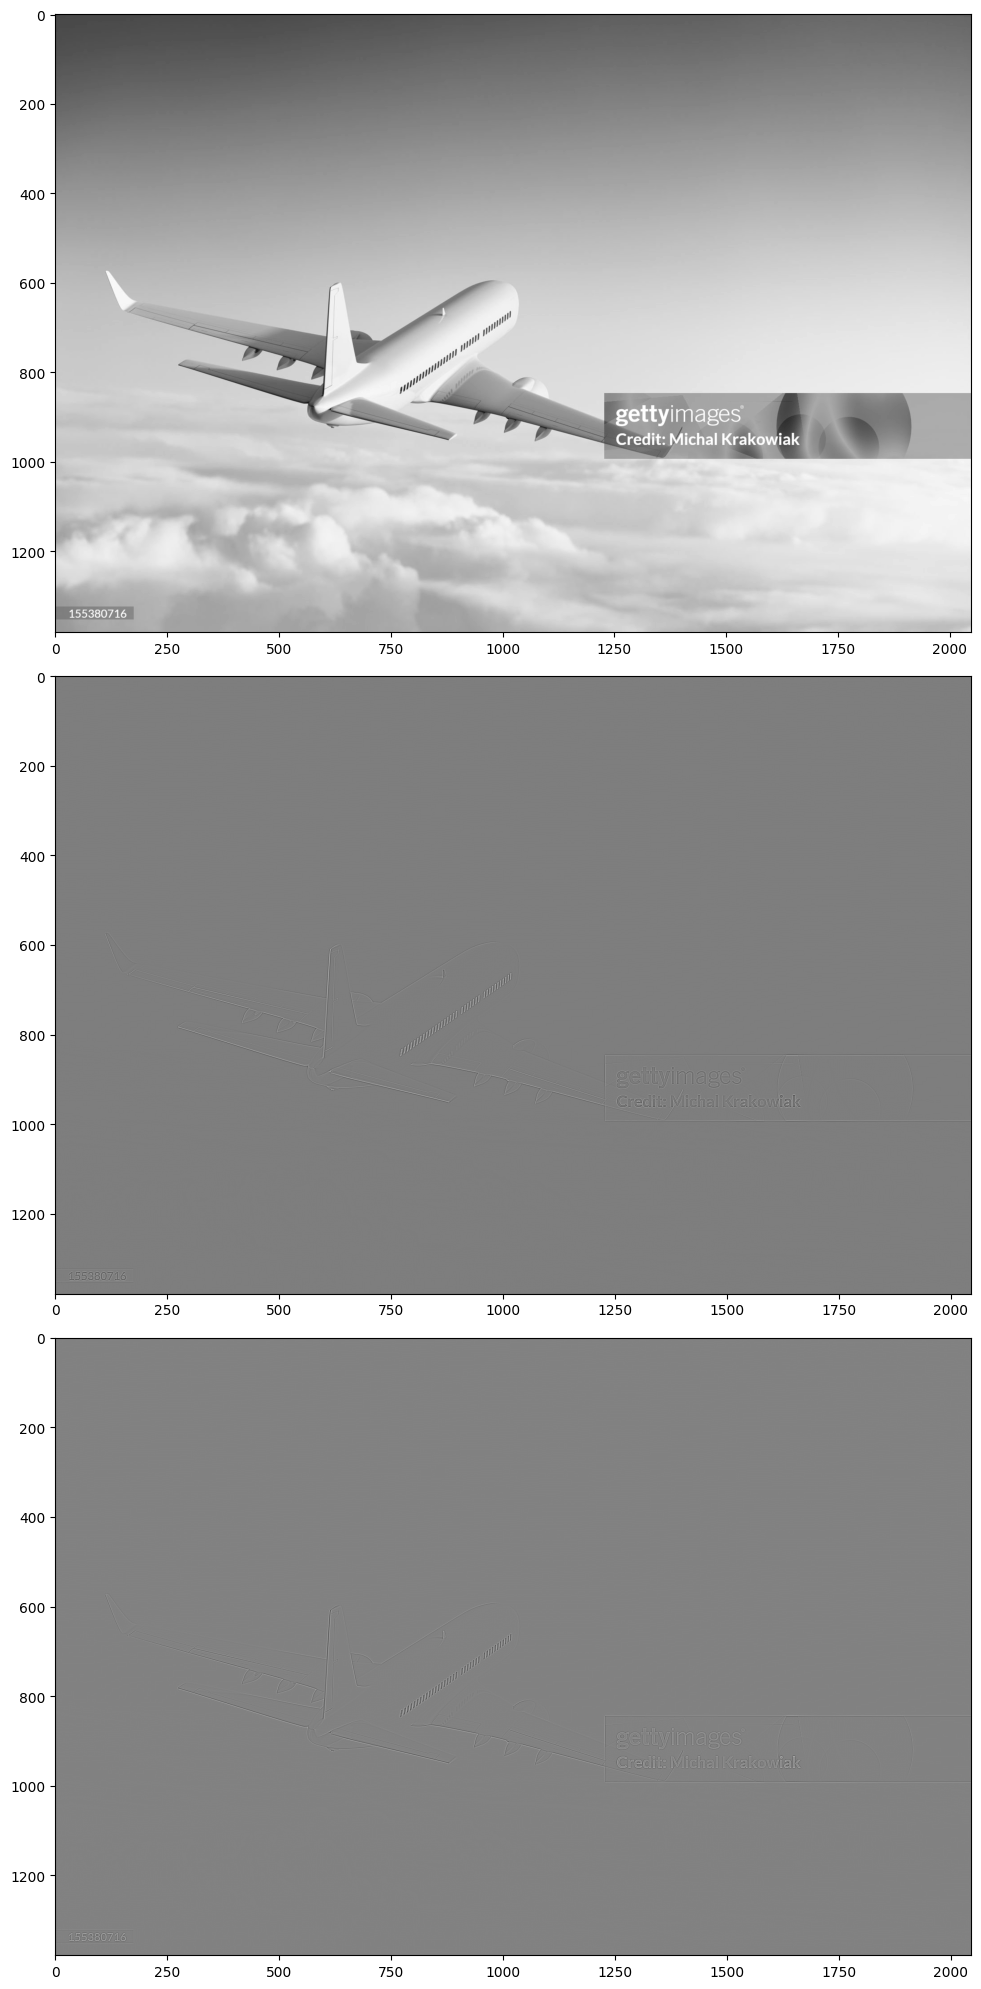

In [12]:
plt.figure(figsize=(50,20))
plt.subplot(3,1,1)
plt.imshow(image,cmap='gray')

plt.subplot(3,1,2)
plt.imshow(filter_image2, cmap="gray")

plt.subplot(3,1,3)
plt.imshow(filter_image3, cmap="gray")
plt.tight_layout()
plt.show()